In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data = data.drop(columns = ['PassengerId','Pclass','Name','Sex','Ticket','Cabin','Embarked'])
data.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [5]:
data.shape

(891, 5)

In [6]:
data.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
# We see some missing data in age.
# Fair cannot be 0.

In [7]:
# Replacing zero values with the mean of the column
data['Fare'] = data['Fare'].replace(0,data['Fare'].mean())

In [8]:
data.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.746366
std,0.486592,14.526497,1.102743,0.806057,49.514272
min,0.000000,0.420000,0.000000,0.000000,4.012500
25%,0.000000,20.125000,0.000000,0.000000,7.925000
50%,0.000000,28.000000,0.000000,0.000000,15.100000
75%,1.000000,38.000000,1.000000,0.000000,32.204208
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Now treating the null value in Age column.
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [10]:
data.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.746366
std,0.486592,13.002015,1.102743,0.806057,49.514272
min,0.000000,0.420000,0.000000,0.000000,4.012500
25%,0.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,29.699118,0.000000,0.000000,15.100000
75%,1.000000,35.000000,1.000000,0.000000,32.204208
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
# We have just treated null and 0 values.

In [82]:
# Lets plot an graph.

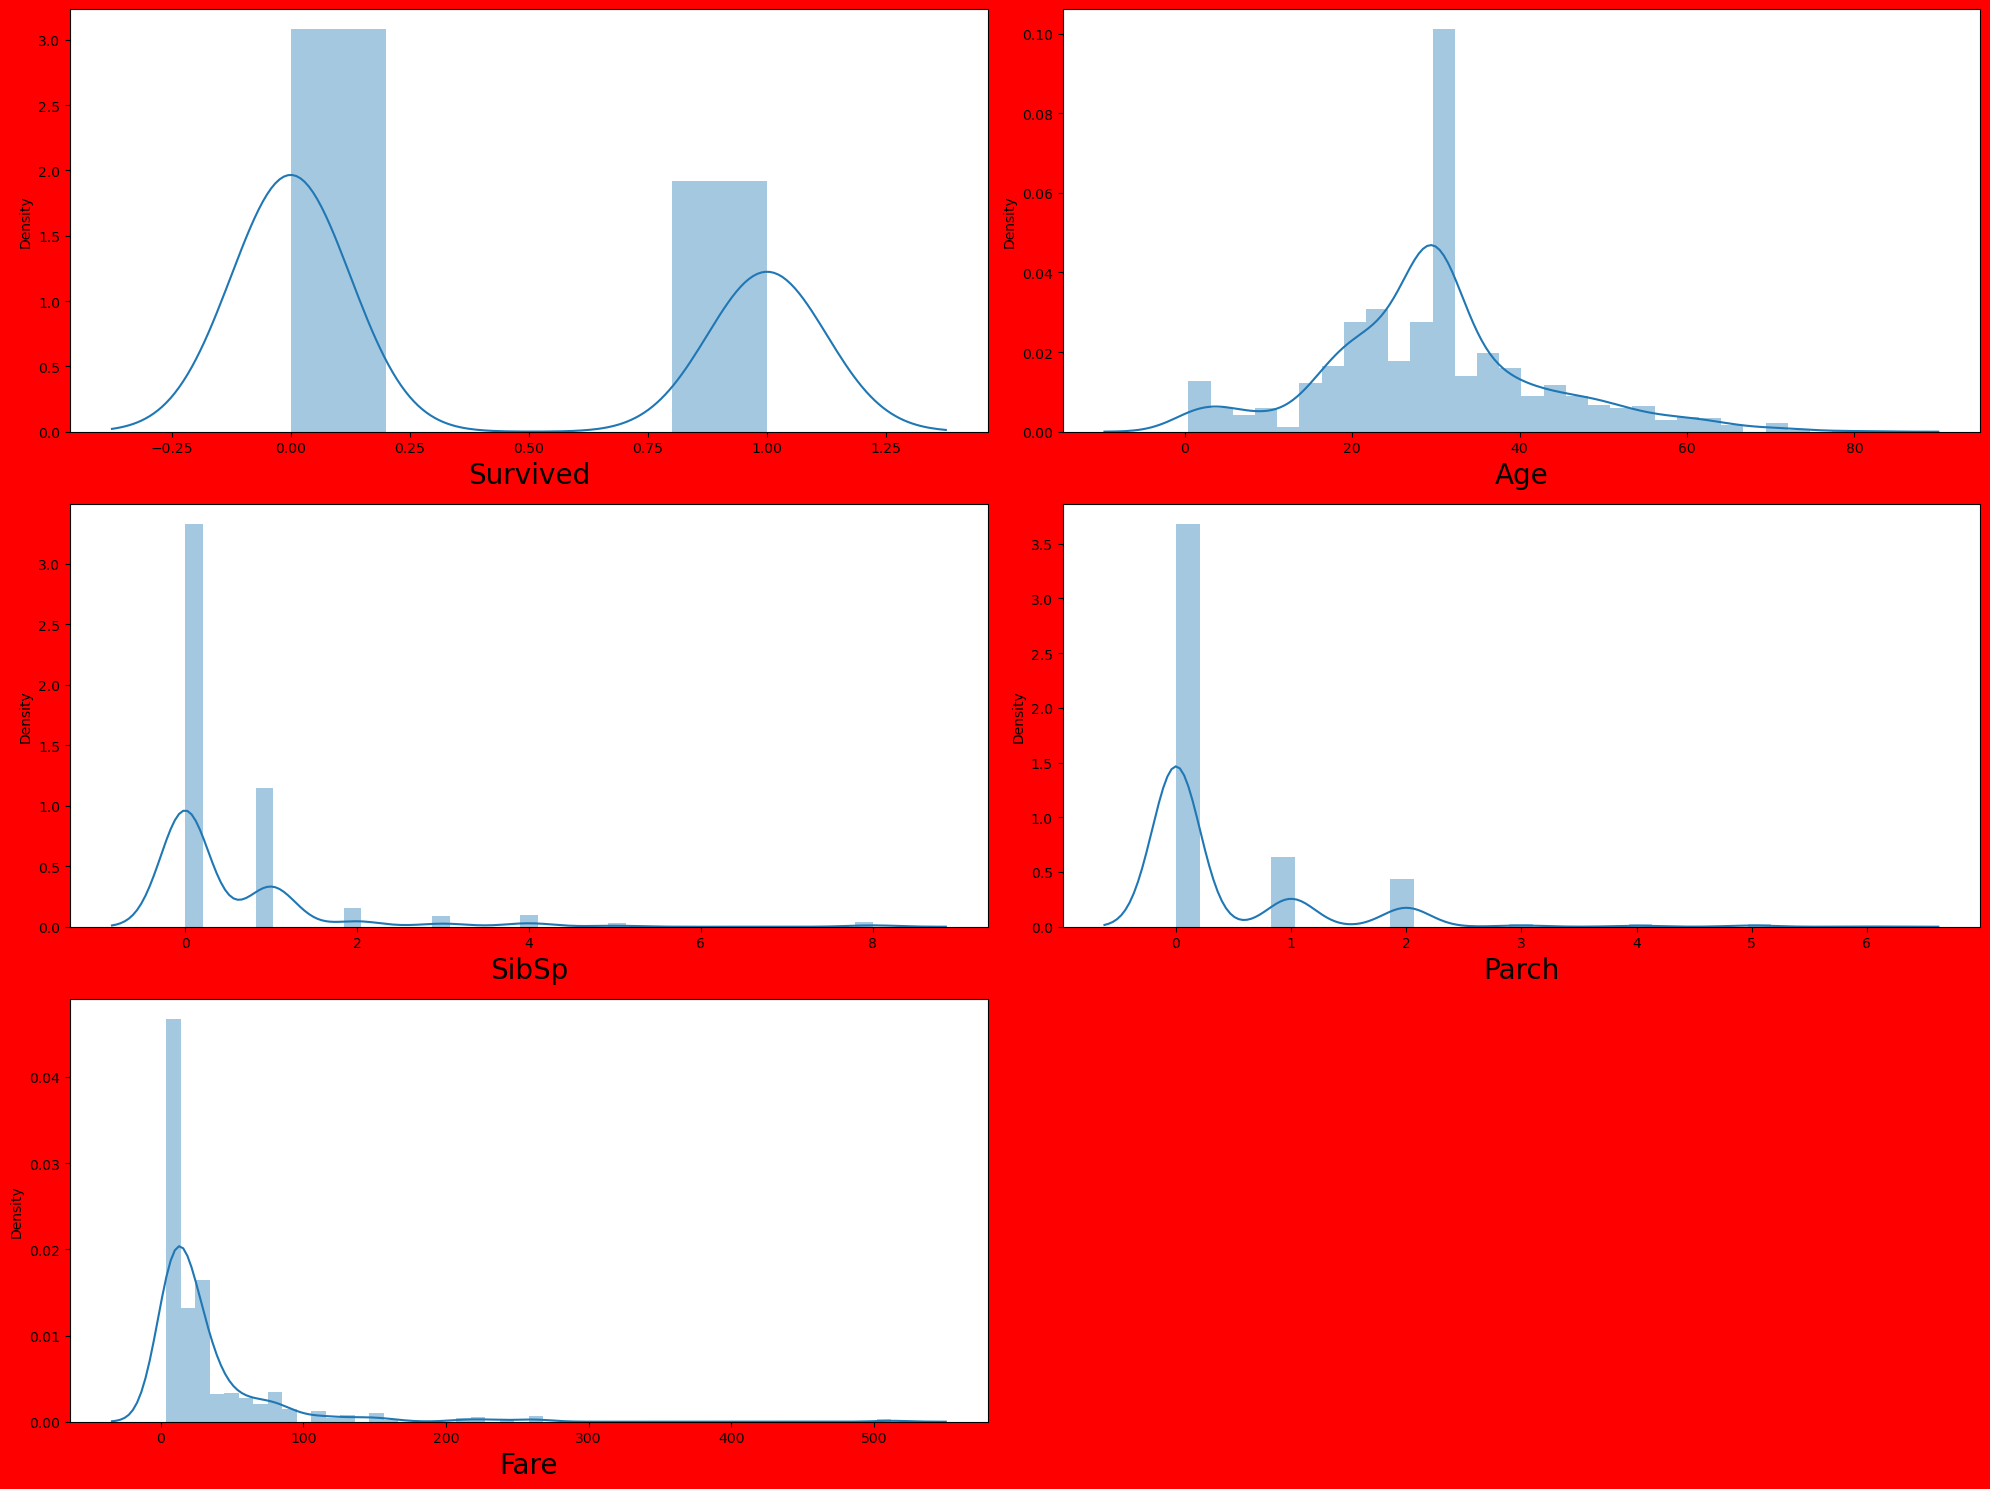

In [11]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [ ]:
# We can see some skewness in the data. Lets see that in detail.

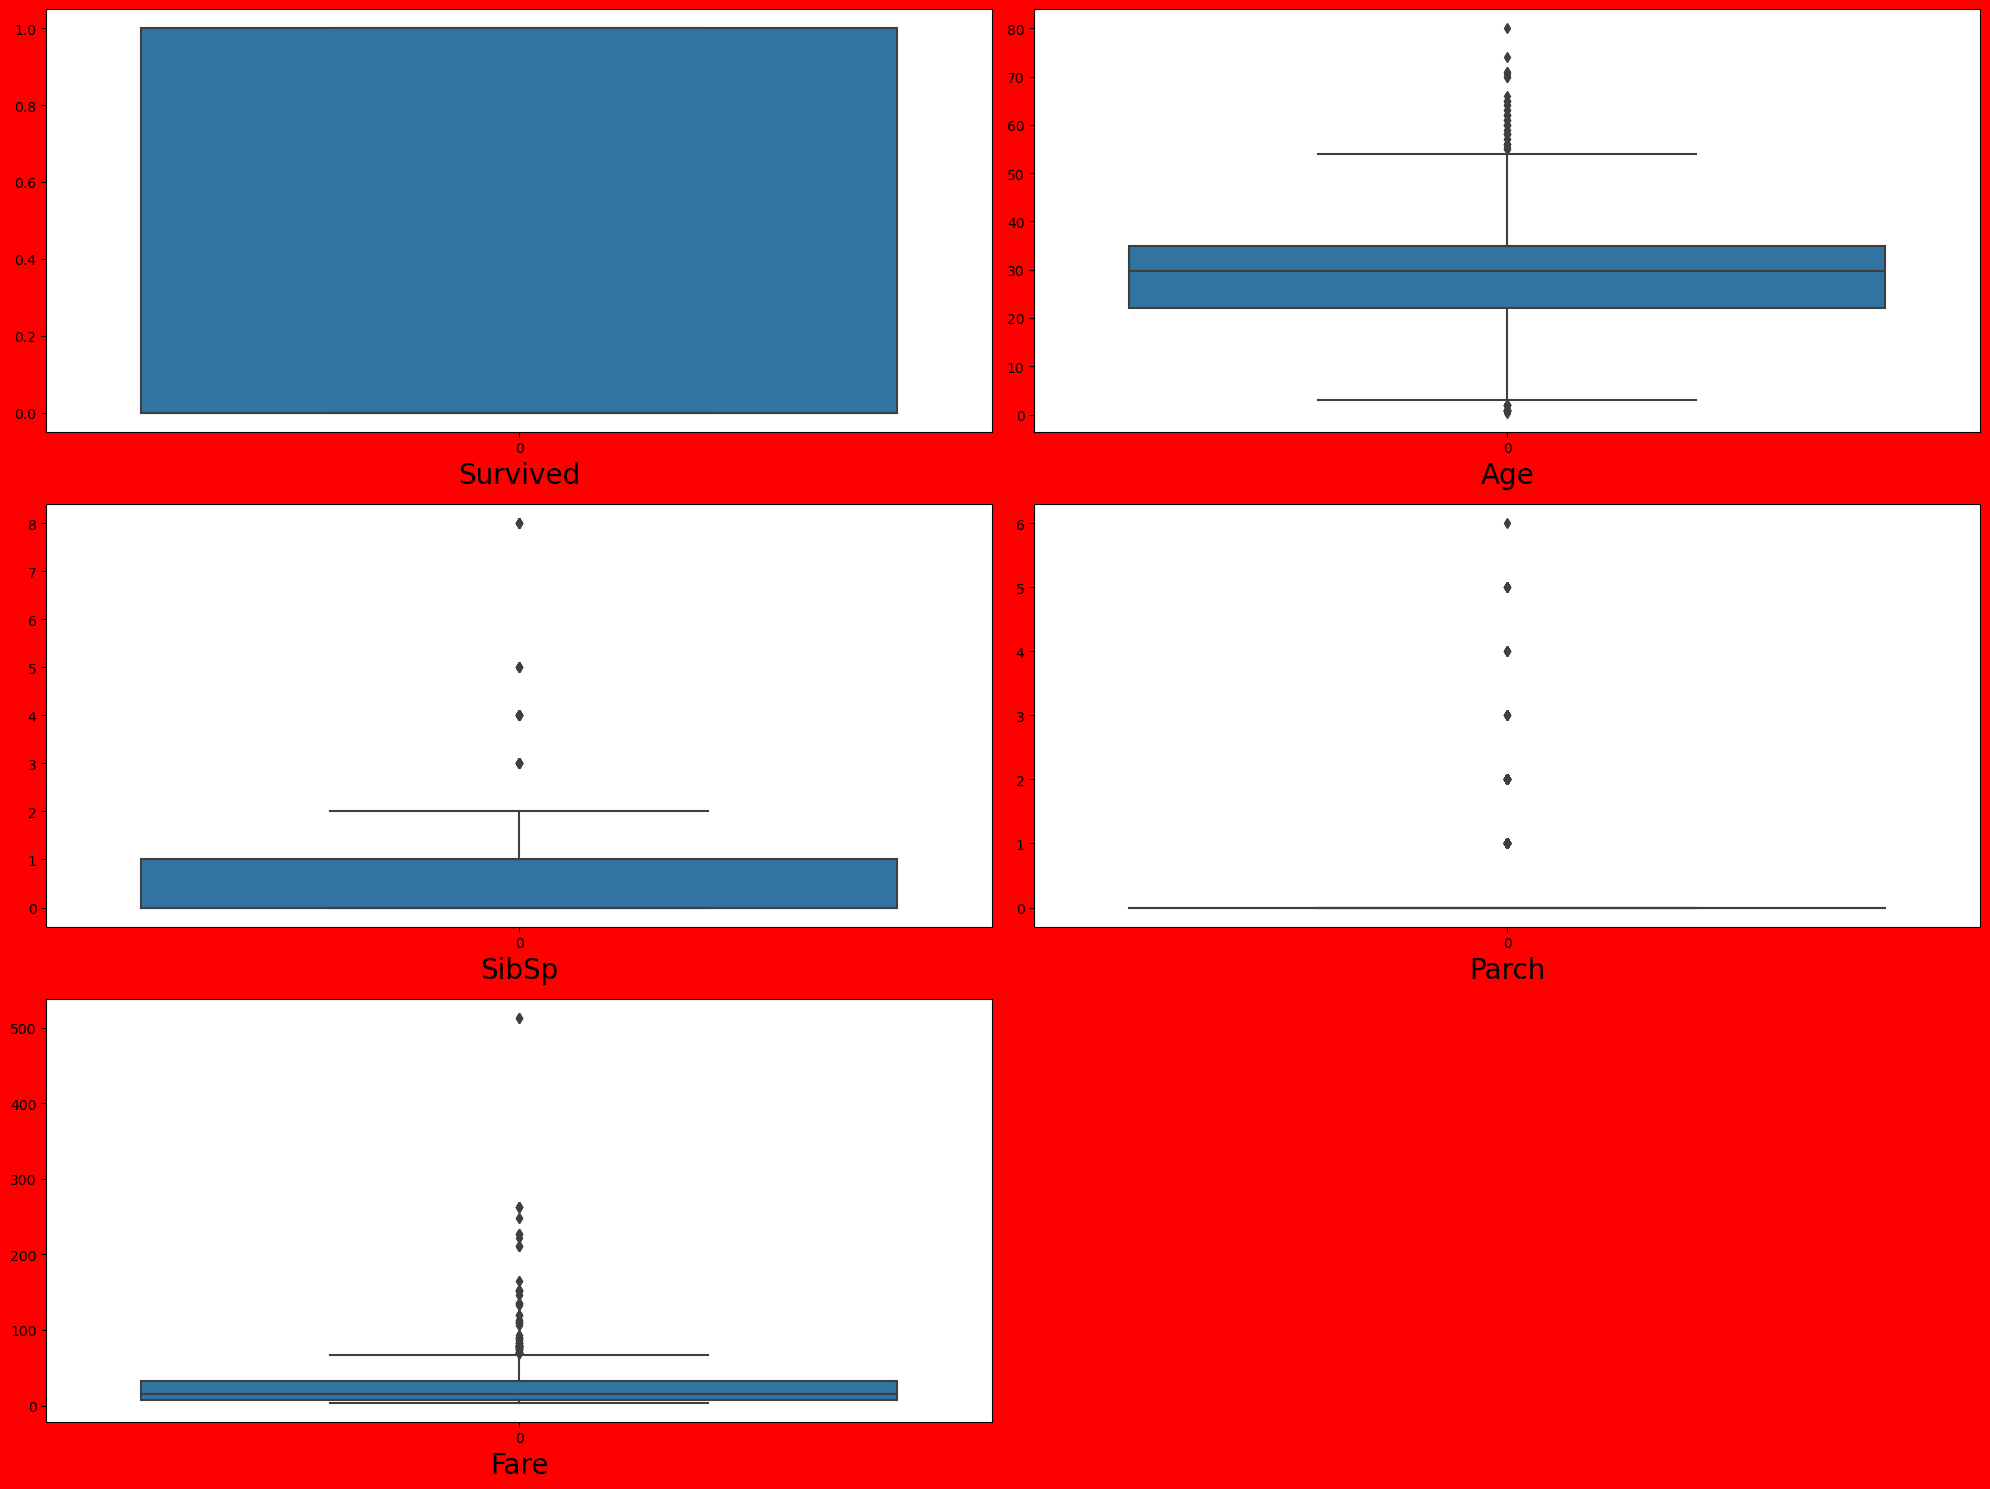

In [15]:
plt.figure(figsize=(20,15), facecolor='red')
graph = 1

for column in data:
    if graph<=5:
        plt.subplot(3,2,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.tight_layout()

In [ ]:
# we can se outliers . so lets treat it.

In [16]:
# Finding inter quartile range to identify outliers.

q1 = data.quantile(0.25)

q3 = data.quantile(0.75)

iqr = q3-q1

In [17]:
q1

Survived     0.000
Age         22.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 0.25, dtype: float64

In [18]:
age_high = (q3['Age'] + (1.5 * iqr['Age']))
print (age_high)

index_4 = np.where(data['Age'] > age_high)

data = data.drop(data.index[index_4])
print (data.shape)

data.reset_index()

54.5
(849, 5)


,index,Survived,Age,SibSp,Parch,Fare
0,0,0,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,2,1,26.000000,0,0,7.9250
3,3,1,35.000000,1,0,53.1000
4,4,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...
844,886,0,27.000000,0,0,13.0000
845,887,1,19.000000,0,0,30.0000
846,888,0,29.699118,1,2,23.4500
847,889,1,26.000000,0,0,30.0000


In [19]:
age_low = (q1['Age'] - (1.5 * iqr['Age']))
print (age_low)

index_5 = np.where(data['Age'] < age_low)

data = data.drop(data.index[index_5])
print (data.shape)

data.reset_index()

2.5
(825, 5)


,index,Survived,Age,SibSp,Parch,Fare
0,0,0,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,2,1,26.000000,0,0,7.9250
3,3,1,35.000000,1,0,53.1000
4,4,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...
820,886,0,27.000000,0,0,13.0000
821,887,1,19.000000,0,0,30.0000
822,888,0,29.699118,1,2,23.4500
823,889,1,26.000000,0,0,30.0000


In [20]:
sib_high = (q3['SibSp'] + (1.5 * iqr['SibSp']))
print (sib_high)

index_4 = np.where(data['SibSp'] > sib_high)

data = data.drop(data.index[index_4])
print (data.shape)

data.reset_index()

2.5
(786, 5)


,index,Survived,Age,SibSp,Parch,Fare
0,0,0,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,2,1,26.000000,0,0,7.9250
3,3,1,35.000000,1,0,53.1000
4,4,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...
781,886,0,27.000000,0,0,13.0000
782,887,1,19.000000,0,0,30.0000
783,888,0,29.699118,1,2,23.4500
784,889,1,26.000000,0,0,30.0000


In [21]:
far_high = (q3['Fare'] + (1.5 * iqr['Fare']))
print (far_high)

index_4 = np.where(data['Fare'] > far_high)

data = data.drop(data.index[index_4])
print (data.shape)

data.reset_index()

68.6230199214366
(694, 5)


,index,Survived,Age,SibSp,Parch,Fare
0,0,0,22.000000,1,0,7.2500
1,2,1,26.000000,0,0,7.9250
2,3,1,35.000000,1,0,53.1000
3,4,0,35.000000,0,0,8.0500
4,5,0,29.699118,0,0,8.4583
...,...,...,...,...,...,...
689,886,0,27.000000,0,0,13.0000
690,887,1,19.000000,0,0,30.0000
691,888,0,29.699118,1,2,23.4500
692,889,1,26.000000,0,0,30.0000


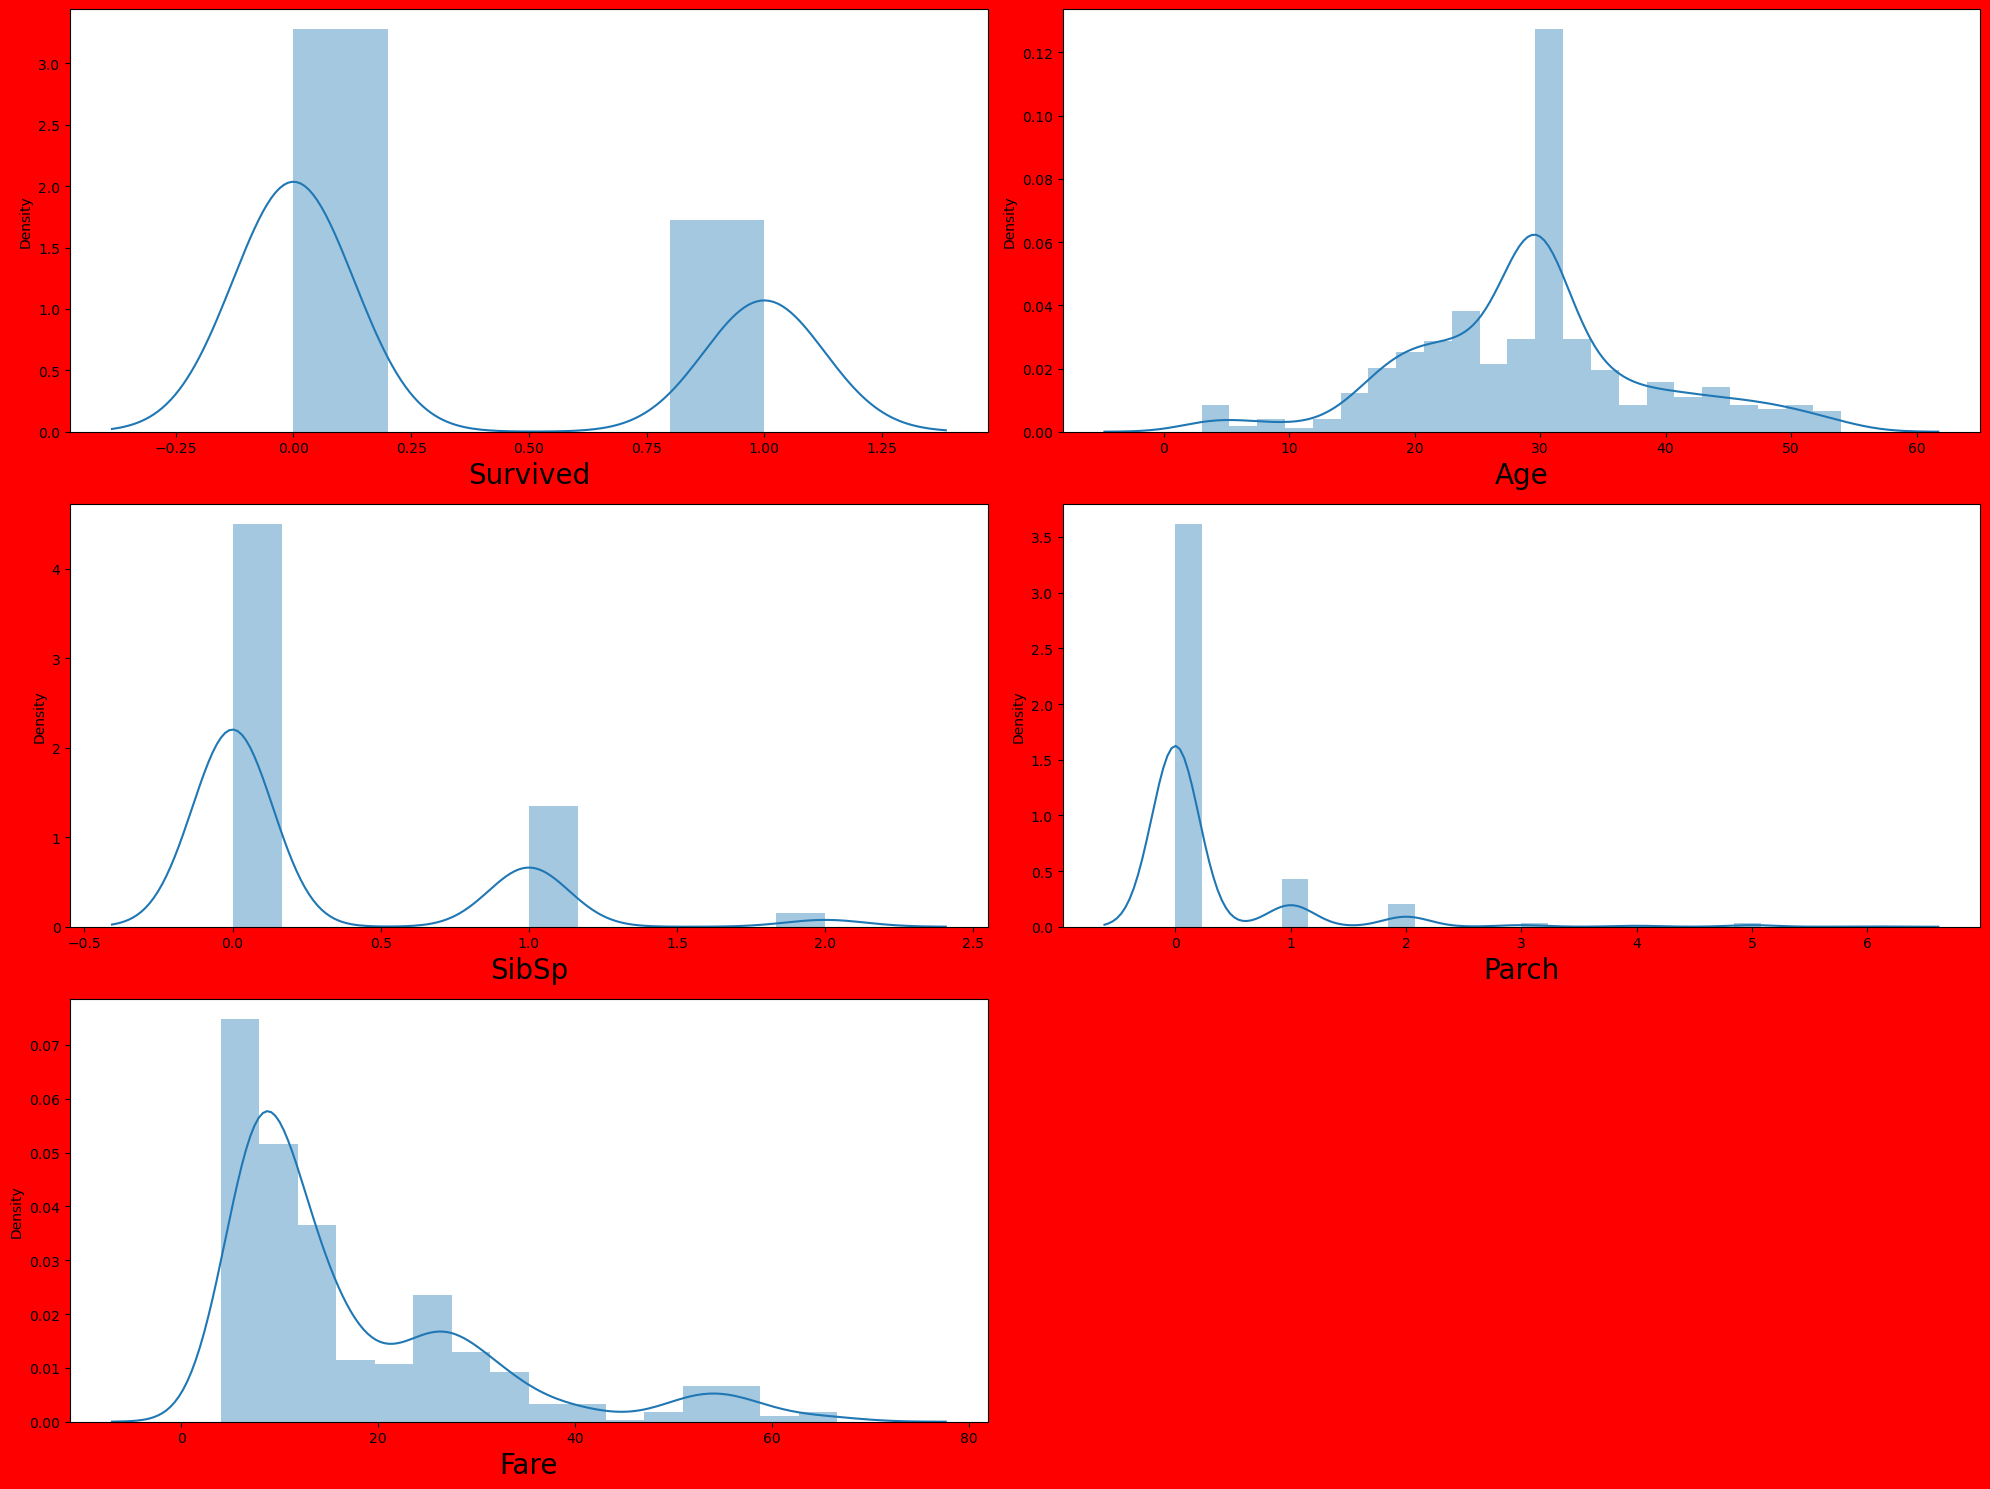

In [22]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [ ]:
# Divide data into feature and label.

In [23]:
y = data['Survived']
x = data.drop(columns = ['Survived'])

In [24]:
y

0      0
2      1
3      1
4      0
5      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 694, dtype: int64

In [25]:
x

,Age,SibSp,Parch,Fare
0,22.000000,1,0,7.2500
2,26.000000,0,0,7.9250
3,35.000000,1,0,53.1000
4,35.000000,0,0,8.0500
5,29.699118,0,0,8.4583
...,...,...,...,...
886,27.000000,0,0,13.0000
887,19.000000,0,0,30.0000
888,29.699118,1,2,23.4500
889,26.000000,0,0,30.0000


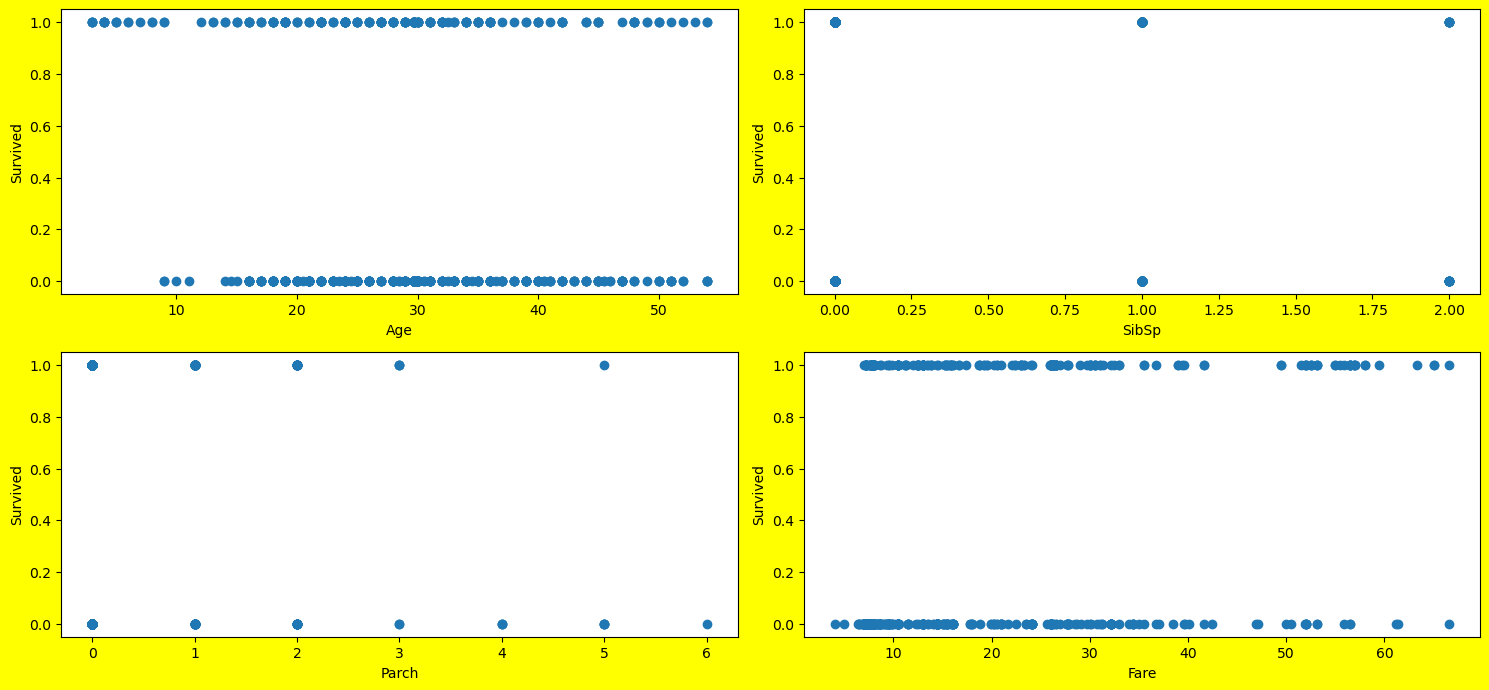

In [26]:
plt.figure(figsize = (15,10), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber<=5 :
        ax = plt.subplot(3,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Survived',fontsize=10)
    plotnumber+=1
    
plt.tight_layout()

In [27]:
# Data scaling.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled

array([[-0.744613  ,  1.44095899, -0.36322488, -0.7663011 ],
       [-0.32520299, -0.55112376, -0.36322488, -0.71669888],
       [ 0.61846952,  1.44095899, -0.36322488,  2.60297571],
       ...,
       [ 0.06265875,  1.44095899,  2.27633603,  0.42415221],
       [-0.32520299, -0.55112376, -0.36322488,  0.90547747],
       [ 0.30391202, -0.55112376, -0.36322488, -0.72955872]])

In [28]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,1.059490,Age
1,1.183519,SibSp
2,1.123568,Parch
3,1.232472,Fare


In [29]:
# There are no multicollinearity present.

In [ ]:
# Time to split data into train test split.

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size = 0.25, random_state = 355)

In [ ]:
# Model building

In [31]:
y_train.head()

690    1
640    0
35     0
315    1
348    1
Name: Survived, dtype: int64

In [ ]:
# We will be useing logestic regression model.

In [33]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Lets see how our model perform with test data.

In [34]:
y_pred = log_reg.predict(x_test)

In [35]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [36]:
log_reg.predict_proba(x_test)

array([[0.49918008, 0.50081992],
       [0.72750981, 0.27249019],
       [0.7518651 , 0.2481349 ],
       [0.7122032 , 0.2877968 ],
       [0.48199238, 0.51800762],
       [0.33432428, 0.66567572],
       [0.68159442, 0.31840558],
       [0.53867701, 0.46132299],
       [0.2904059 , 0.7095941 ],
       [0.69872438, 0.30127562],
       [0.28630424, 0.71369576],
       [0.74439104, 0.25560896],
       [0.74578387, 0.25421613],
       [0.68736348, 0.31263652],
       [0.67088395, 0.32911605],
       [0.5483929 , 0.4516071 ],
       [0.75046521, 0.24953479],
       [0.72886891, 0.27113109],
       [0.69397838, 0.30602162],
       [0.82366498, 0.17633502],
       [0.74086163, 0.25913837],
       [0.68541383, 0.31458617],
       [0.72562481, 0.27437519],
       [0.68888958, 0.31111042],
       [0.77233074, 0.22766926],
       [0.69051831, 0.30948169],
       [0.73396238, 0.26603762],
       [0.47960251, 0.52039749],
       [0.43294012, 0.56705988],
       [0.66567447, 0.33432553],
       [0.

In [37]:
# lets check model accuracy

In [38]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6954022988505747

In [ ]:
# our model here shows accuracy pf 69.54%.